## Blood Donors with Hepatitis C, Fibrosis and Cirrhosis

### 1 | Introduction

The dataset contains laboratory values of blood donors and Hepatits C patients and demographic values. 

The target attribute (dependent variable) is Category where 0 represents Blood Donor, 1 represents Suspect Blood Donor, 2 represents Hepatitis, 3 represents Fibrosis and 4 represents Cirrohsis.

The Roche Diagnostics used to test for liver disease were measured using Roche Diagnostics Test. The list of the six diagnostic tests are represented in the the data through the six abbreviations. 
   - ALB represents Albumin
   - ALP represents Alkaline Phosphatase
   - ALT represents Alanine Amino-Transferase 
   - AST represents Aspartate Amino-Transferase
   - BIL represents Bilirubin
   - CHE represents choline esterase
   - CHOL represents Cholesterol
   - CREA represents Creatinine
   - GGT represents Gamma Glutayl-Transferase
   - PROT represents Protomine

###### Albumin Test

When completing the diagnostic test for liver disease the tests evaluate the present levels of variaous proteins and enzymes that are in the blood. Albumin is a protein that is made by the liver. An albumin test checks the functions of the kidney and the liver. When albumin levels are low this is a sign of kidney or liver disease, conversely, when albumin levels are high this indicates dehydration or severe diarrhea. 

###### Alkaline Phosphatase Test

Alkaline Phosphatase is an enzyme found in the body. The protein enzymes break smaller molecules down and help smaller molecules join together. The protein occurs through the liver, kidneys and bones. The enzyme is found in the bloodstream. When there are high ALP levels in your bloodstream this indicates there could be damage to the liver or a bone disorder, where lower levels of ALP may indicate a rare genetic disorder called, Hypophosphatasia.

###### Alanine Amino-Transferase Test

Alanine Amino-Transferase enzyme is found in the liver and the blood. ALT is used to break down food into energy. ALT is released by the liver, and when ALT levels are high this may lead to liver damage, since the liver regulates the amount of ALT in the bloodstream.

###### Aspartate Amino-Transferase Test

Aspartate Amino-Transferase is a protein that helps act as a catalyst in the body for certain processes to happen. This enzyme occurs in the liver, heart, brain, kidneys and muscles, but is associated with liver health. High levels of AST are indicative of liver damage. When AST levels are high in the bloodstream, this indicates lvier damage can be present, becuase the liver secretes small levels of AST into the blood stream. 

###### Bilirubin Test

The Bilirubin Test measures how much bilirubin is in the blood.Bilirubin is an orange-yellow pigment that occurs normally when part of the red blood cells breakdown. The liver breaksdown the bilirubin, from the red blood cells, and passes them through fecal waste as bile. If the bilirubin levels are high this is a sign that the red blood cells are breakdown too fast, or that the liver is not breaking down fecal matter properly and clearing the bilirubin in the blood. 

###### Choline Esterase Test

The Choline Esterase Test is a blood test that analyzes two substances: acetylcholine esterase and pseudocholine esterase. These substances are essential for communication between nerves. Acetylcholine esterase occurs more naturally in the nerve tissue and red bloodcells where pseudocholine esterase is found in the liver. When the choline esterase test reveals lower CHE levels this indicates a decreased secreation of pseudocholine esterase which is due to several factors, such as, liver damage and other abnormalities. 

###### Gamma Glutamyl Transferase Test

The Gamma Glutamyl Transferase Test measures the presence of the GGT protein in the bloodstream. the GGT protein is found primarily in the liver. When the GGT levels are high this indicates that there is liver damage. 

The aim of this project is to use multiple supervised machine learning techniques to predict which protein tests help determine the various levels of damage to the liver (Hepatitis C, Fibrosis or Cirrhosis). An ordinal regression, random forest, k nearest neighbors and naive bayes analysis will be completed to determine the accuracy of each predicitive analysis. 

### 2 | Data Analysis

In [1]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#Random Forest
from sklearn.ensemble import RandomForestRegressor

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [2]:
hpc = pd.read_csv("hc.csv")

In [3]:
hpc.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
hpc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [5]:
hpc.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [6]:
hpc[["ALB","ALP","ALT","CHOL","PROT"]].mean()

ALB     41.620195
ALP     68.283920
ALT     28.450814
CHOL     5.368099
PROT    72.044137
dtype: float64

In [7]:
hpc[["ALB","ALP","ALT","CHOL","PROT"]].median()

ALB     41.95
ALP     66.20
ALT     23.00
CHOL     5.30
PROT    72.20
dtype: float64

In [8]:
hpc["ALB"]=hpc["ALB"].fillna(hpc["ALB"].median())
hpc["ALP"]=hpc["ALP"].fillna(hpc["ALP"].median())
hpc["ALT"]=hpc["ALT"].fillna(hpc["ALT"].median())
hpc["CHOL"]=hpc["CHOL"].fillna(hpc["CHOL"].median())
hpc["PROT"]=hpc["PROT"].fillna(hpc["PROT"].median())

hpc.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [9]:
hpc[['Category','Type']] = hpc['Category'].str.split('=',expand = True)

In [10]:
hpc.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Type
0,1,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,Blood Donor
1,2,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,Blood Donor
2,3,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,Blood Donor
3,4,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,Blood Donor
4,5,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,Blood Donor


In [11]:
hpc['Category'].unique()

array(['0', '0s', '1', '2', '3'], dtype=object)

In [12]:
hpc['Type'].unique()

array(['Blood Donor', 'suspect Blood Donor', 'Hepatitis', 'Fibrosis',
       'Cirrhosis'], dtype=object)

In [13]:
lb , le = LabelBinarizer(), LabelEncoder()

In [14]:
hpc["Category"] = le.fit_transform(hpc["Category"])
hpc["Sex"] = lb.fit_transform(hpc["Sex"])

In [15]:
hpc.drop("Unnamed: 0",axis = 1,inplace = True)
hpc.drop("Type",axis = 1, inplace = True)

In [16]:
hpc.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


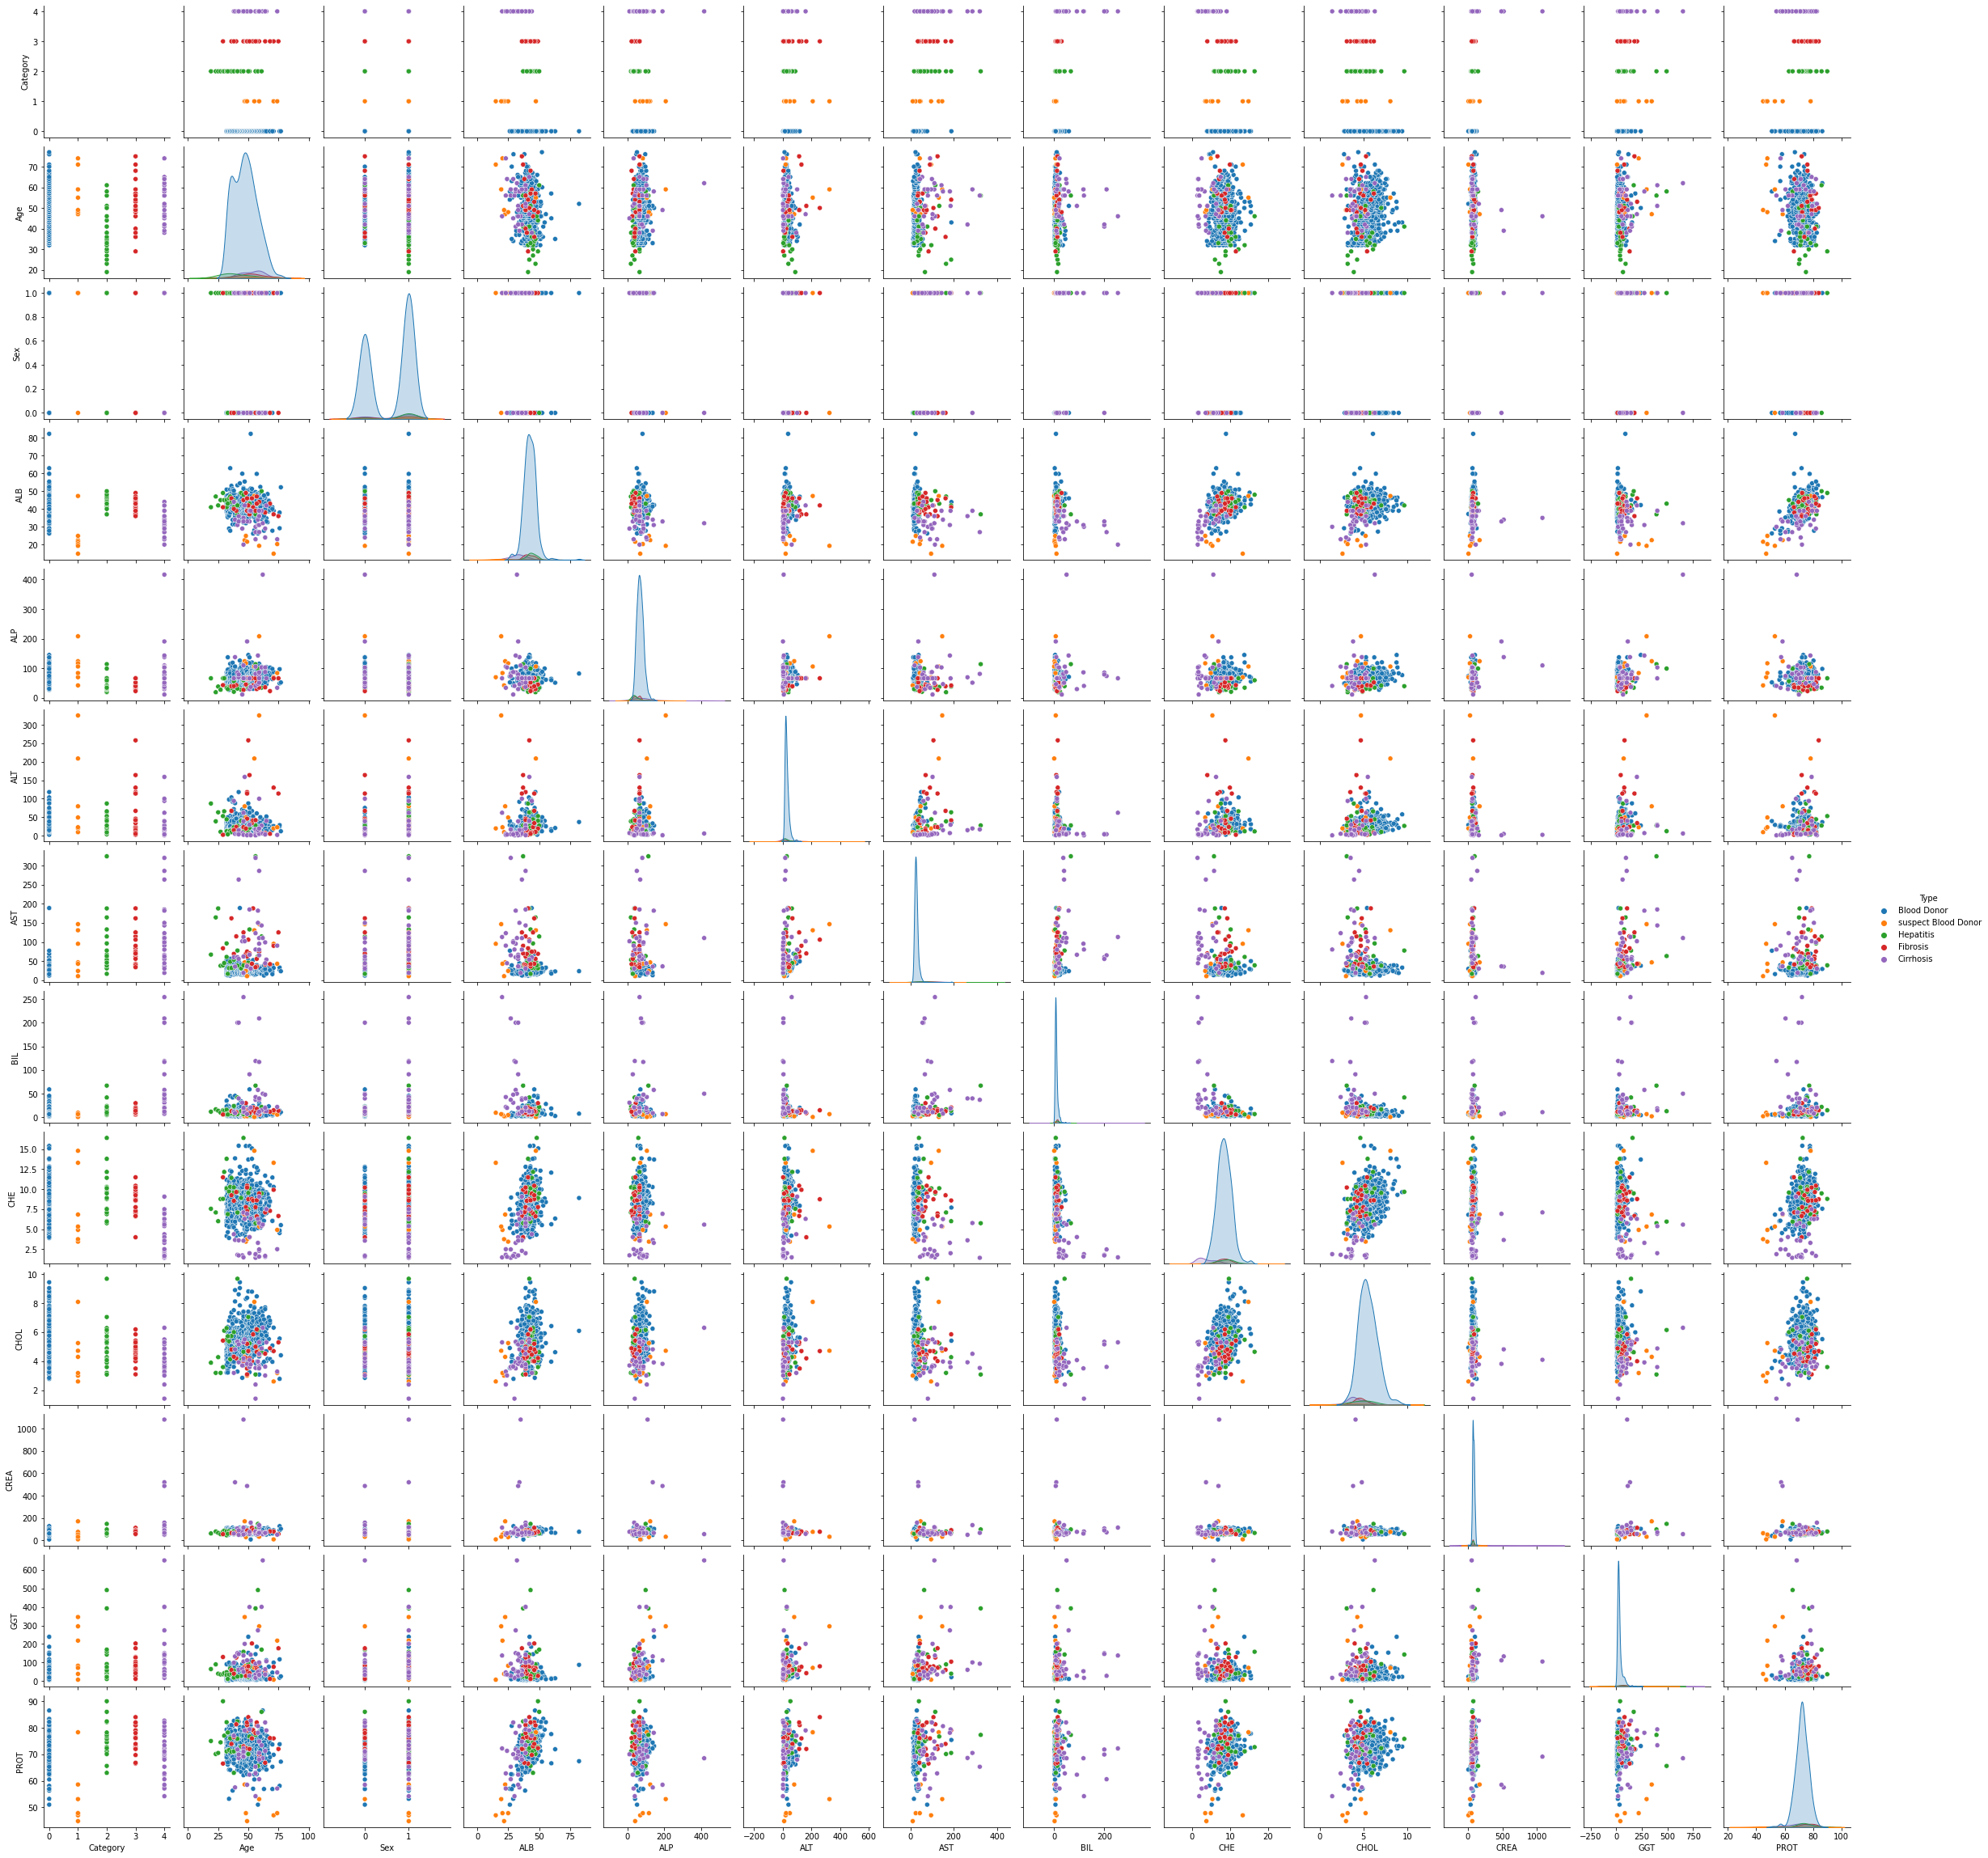

In [172]:
sns.pairplot(hpc,hue = "Type")

### 3 | Oridnal Regression Analysis

In [30]:
#Loading Libraries 
from pandas.api.types import CategoricalDtype

#Ordinal Regression Analysis
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import OrderedModel

In [31]:
#Ordinal Regression and Analysis
x = hpc.drop(['Category'],axis = 1)
y = hpc['Category']

In [231]:
OR_model = OrderedModel(y,x,distr = 'logit')
res_log = mod_prob.fit(method='bfgs')
res_log.summary()

NameError: name 'mod_prob' is not defined

### 4 | Decision Tree Analysis

In [32]:
#Loading Libraries
#Decision Tree Algorithm
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#Metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Scale Data
from sklearn.preprocessing import StandardScaler

#Visualization
from sklearn.tree import plot_tree

In [33]:
#Training and Test Data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

#Scaling Data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
#Decision Tree Analysis
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred_DT = clf.predict(x_test)

accuracy_DT_Pred = metrics.accuracy_score(y_test,y_pred_DT)
print(f"Decision Tree Predicted Score Accuracy: {accuracy_DT_Pred}")

Decision Tree Predicted Score Accuracy: 0.8701298701298701


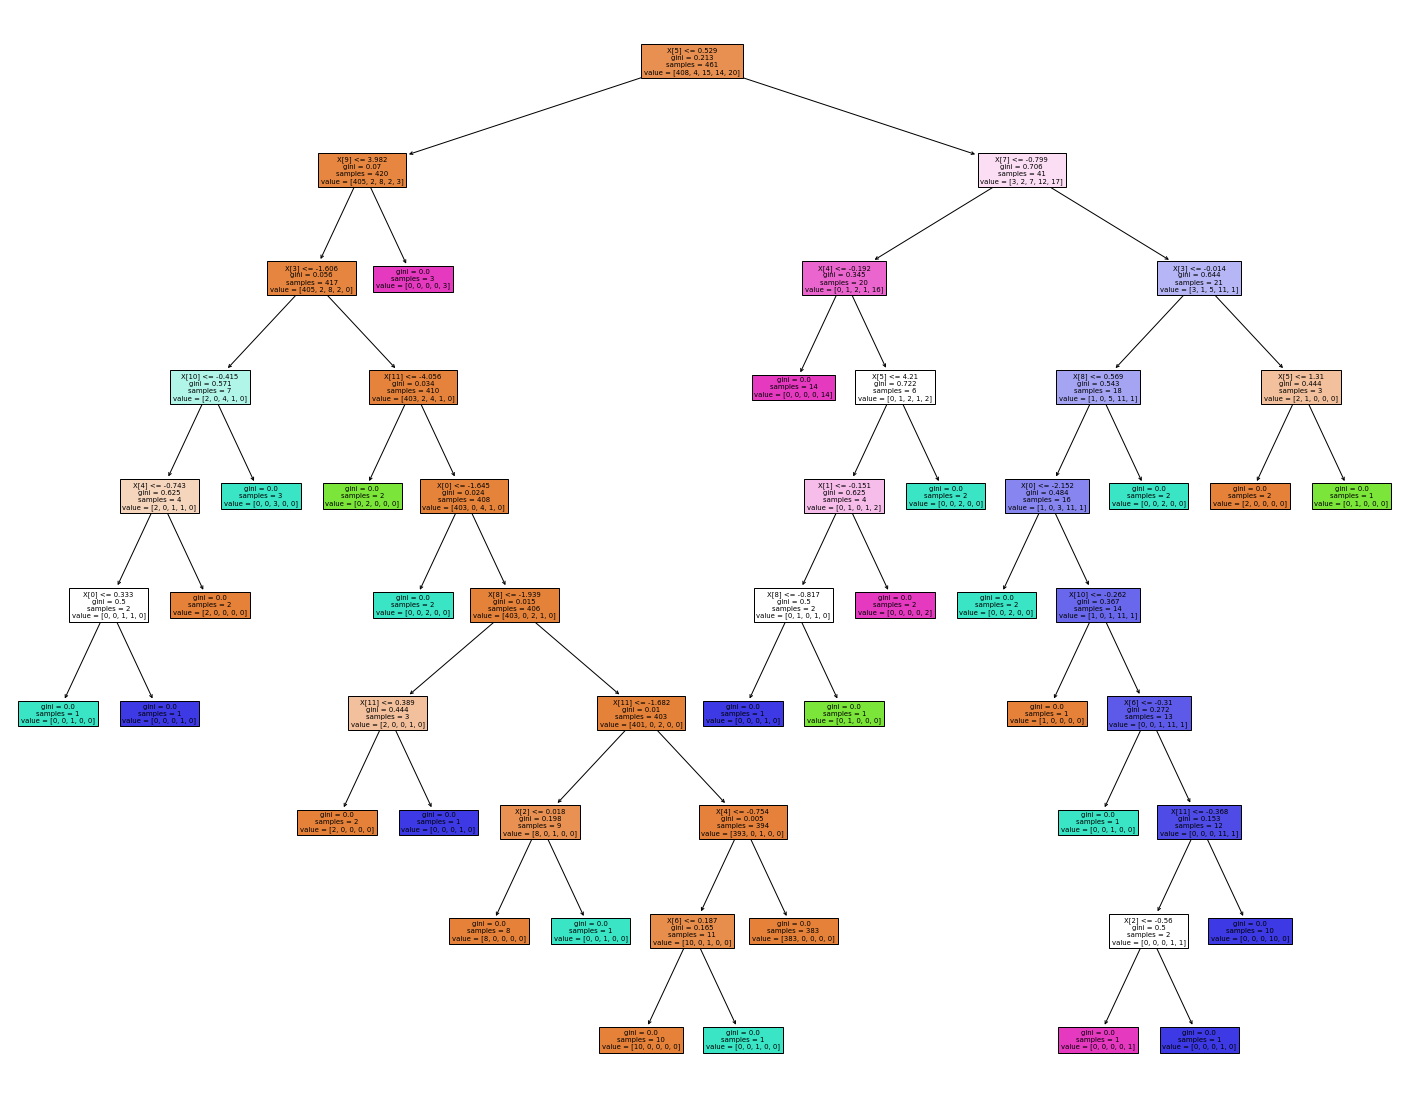

In [35]:
#Decision Tree Visualization
plt.figure(figsize = (25,20))
plot_tree(clf,filled = True)
plt.show()

### 5 | Random Forest Analysis

In [36]:
#Loading Libraries
import numpy as np

#Random Forest Algorithm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [37]:
#Random Forest Analysis
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rfl = rf.fit(x_train,y_train)
y_pred_RF =rf.predict(x_test)

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rf_accuracy = rfc.score(x_test,y_test)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.8961038961038961


### 6 | Naive Bayes Analysis

In [38]:
#Loading Libraries
#Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

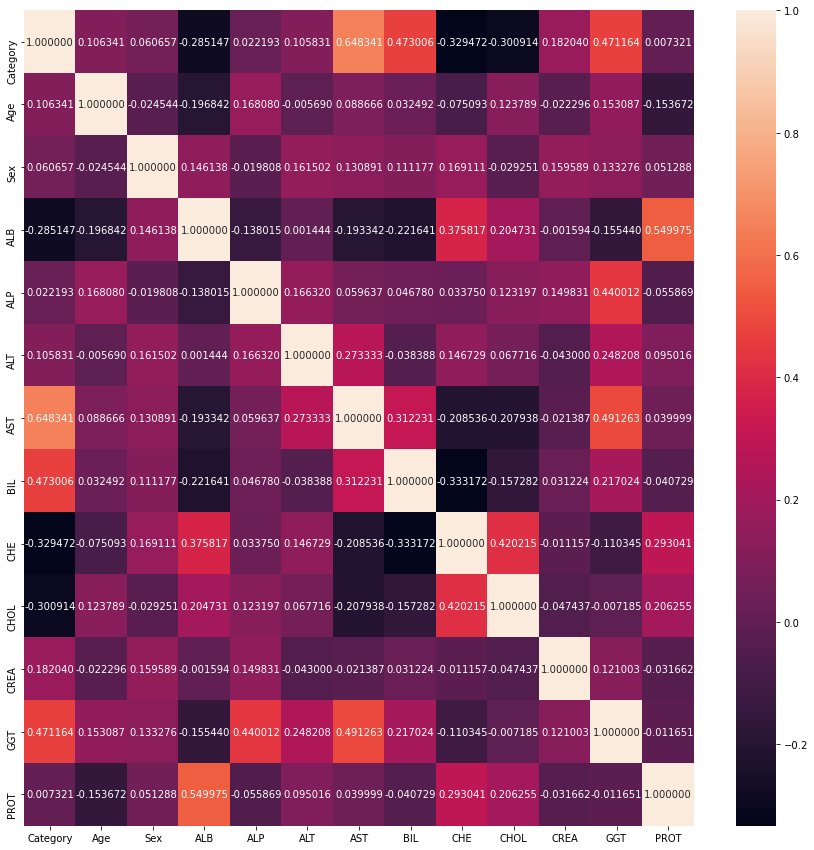

In [39]:
plt.subplots(figsize = (15,15))
sns.heatmap(hpc.corr(),annot = True, fmt = "f")
plt.show()

In [40]:
gaussian = GaussianNB()
nb = gaussian.fit(x_train,y_train)
y_pred_NB = gaussian.predict(x_test)

accuracy_nb = metrics.accuracy_score(y_test,y_pred_NB)
print(f"Naive Bayes Accuracy :{accuracy_nb}")

Naive Bayes Accuracy :0.8506493506493507


### 7 | K Nearest Neighbors Analysis

In [41]:
#Loading Libraries
#KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

#Metrics
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [42]:
#KNN Analysis
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train,y_train)
y_pred_KNN = knn.predict(x_test)

accuracy_KNN = metrics.accuracy_score(y_test,y_pred_KNN)
accuracy_KNN_score = knn.score(x_train,y_train)

print(accuracy_KNN)
print(accuracy_KNN_score)

0.8441558441558441
0.9349240780911063


In [43]:
#Model Fit of Training Data
train_pred_KNN = knn.predict(x_train)

mse_train = mean_squared_error(y_train,train_pred_KNN)
rmse_train =sqrt(mse_train)
print(f"Room Mean Square Deviation of Training Set: {rmse_train}")

#Model Fit of Test Data
test_pred_KNN = knn.predict(x_test)
mse_test = mean_squared_error(y_test,test_pred_KNN)
rmse_test = sqrt(mse_test)
print(f"Room Mean Square Deviation of Test Set:{rmse_test}")

Room Mean Square Deviation of Training Set: 0.641987153627698
Room Mean Square Deviation of Test Set:1.0989959998981833


### 7 | Conclusion

Text(0.5, 1.0, 'Model Accuracy')

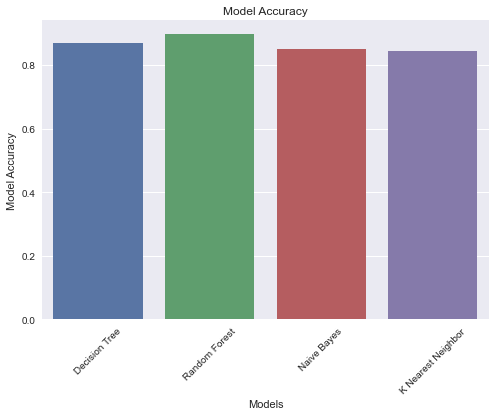

In [47]:
plt.style.use("seaborn")

x = ["Decision Tree", "Random Forest", "Naive Bayes", "K Nearest Neighbor"]
y = [accuracy_DT_Pred,rf_accuracy,accuracy_nb,accuracy_KNN ]

sns.barplot(x=x, y=y)
plt.ylabel("Model Accuracy")
plt.xlabel("Models")
plt.xticks(rotation = 45)
plt.title("Model Accuracy")